In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.utils import shuffle
import statsmodels.formula.api as sm

from scipy.stats import norm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('car data.xlsx')
print('shape : ', data.shape)
data.head()

shape :  (4003, 5)


,Brand,Price,Mileage,EngineV,Year
0,Mercedes-Benz,222000.0,1,6.3,2016
1,Mercedes-Benz,177000.0,1,5.5,2016
2,Mercedes-Benz,177777.0,1,5.5,2016
3,Mercedes-Benz,199999.0,1,5.5,2016
4,Mercedes-Benz,199999.0,1,5.5,2016


# Checking Linearity 

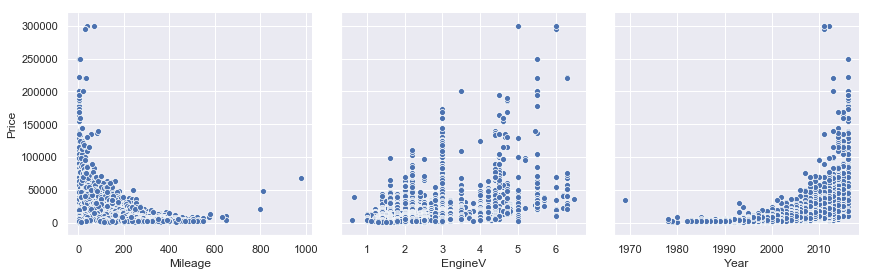

In [3]:
y_var = ['Price']
x_var = ["Mileage", "EngineV", "Year"]
sns.set()
sns.pairplot(data,x_vars=x_var, y_vars=y_var, size =4 )
plt.show();

###### Exponential Scatter Plot 
changing to log term

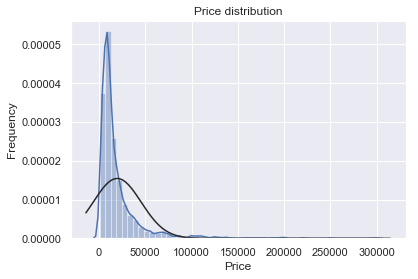

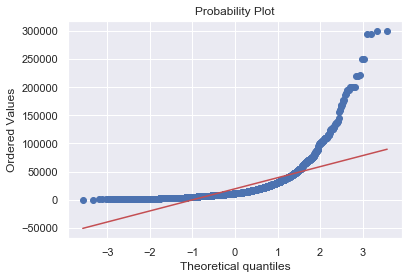

In [4]:
sns.distplot(data['Price'],fit = norm)
plt.ylabel('Frequency')
plt.title('Price distribution')

# QQ plot
fig = plt.figure()
res = stats.probplot(data['Price'],plot = plt)

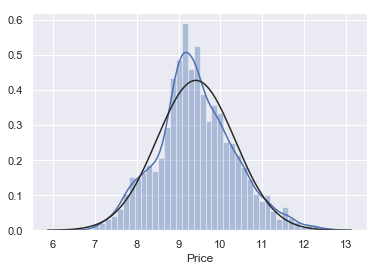

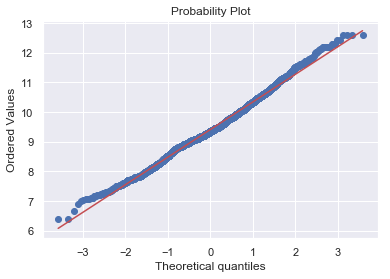

In [5]:
data['Price'] = np.log(data['Price'])
sns.distplot(data['Price'],fit = norm)
fig = plt.figure()
res = stats.probplot(data['Price'],plot = plt)

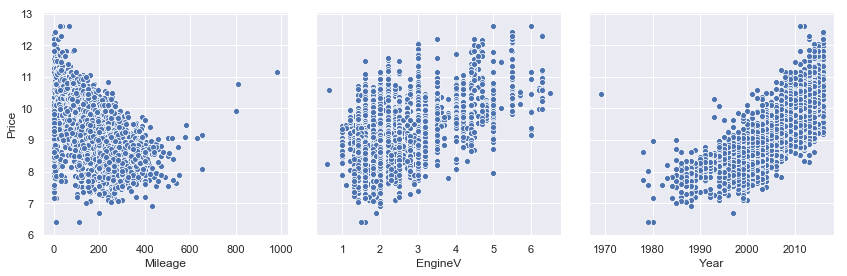

In [6]:
y_var = ['Price']
x_var = ["Mileage", "EngineV", "Year"]
sns.set()
sns.pairplot(data,x_vars=x_var, y_vars=y_var, size =4 )
plt.show();

EngineV and Year graph with Price look good but lets check Mileage

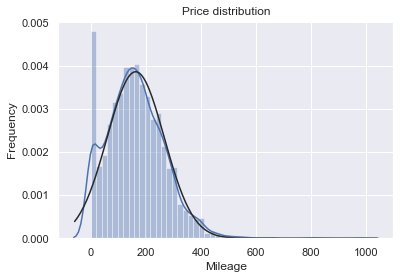

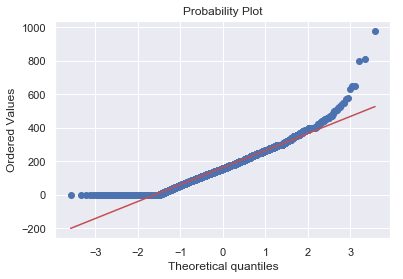

In [7]:
sns.distplot(data['Mileage'],fit = norm)
plt.ylabel('Frequency')
plt.title('Price distribution')

# QQ plot
fig = plt.figure()
res = stats.probplot(data['Mileage'],plot = plt)

In [8]:
data['Mileage'] = data['Mileage'].apply(lambda x: 1 if x == 0 else x)

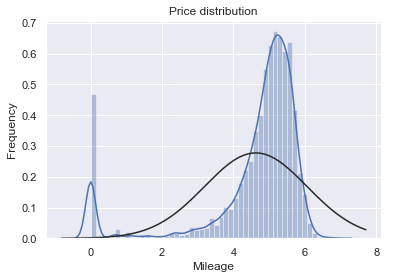

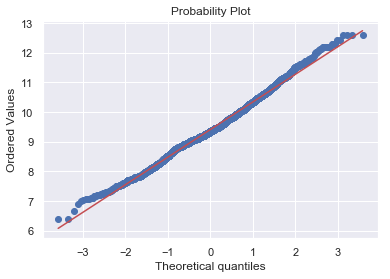

In [9]:
data['Mileage'] = np.log(data['Mileage'])
sns.distplot(data['Mileage'],fit = norm)
plt.ylabel('Frequency')
plt.title('Price distribution')

# QQ plot
fig = plt.figure()
res = stats.probplot(data['Price'],plot = plt)

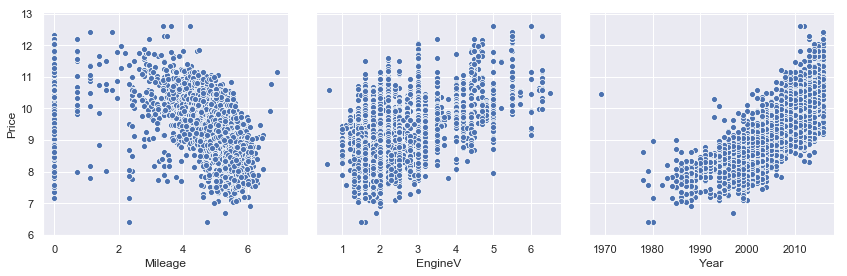

In [10]:
y_var = ['Price']
x_var = ["Mileage", "EngineV", "Year"]
sns.set()
sns.pairplot(data,x_vars=x_var, y_vars=y_var, size =4 )
plt.show();

######  Homoscedacity hold
###### NO autocorrelation 

######  checking for multicollinearity

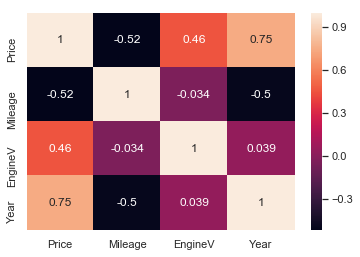

In [11]:
corrmap = data.corr()
sns.heatmap(corrmap, cbar=True, annot=True)

correlation are far from strong so no multicollinearity

###  Checking missing value

In [12]:
total = data.isnull().sum().sort_values(ascending  = False)
percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percentage], axis = 1, keys=['Total', 'Percentage'])
missing_data.head(20)

,Total,Percentage
Year,0,0.0
EngineV,0,0.0
Mileage,0,0.0
Price,0,0.0
Brand,0,0.0


In [13]:
data = pd.get_dummies(data, drop_first=True)
print('shape : ', data.shape)
data.head()

shape :  (4003, 10)


,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen
0,12.310433,0.0,6.3,2016,0,1,0,0,0,0
1,12.083905,0.0,5.5,2016,0,1,0,0,0,0
2,12.088285,0.0,5.5,2016,0,1,0,0,0,0
3,12.206068,0.0,5.5,2016,0,1,0,0,0,0
4,12.206068,0.0,5.5,2016,0,1,0,0,0,0


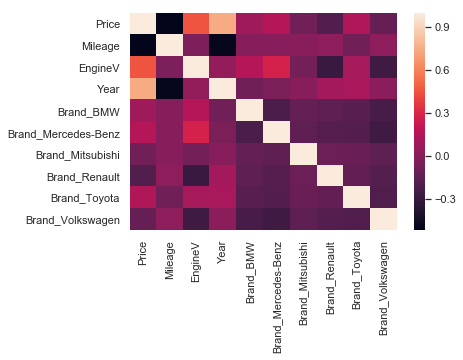

In [14]:
sns.heatmap(data.corr())

# Modeling 

In [15]:
for i in range(5):
    data = shuffle(data)

In [16]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [17]:
X = np.append(arr = np.ones((X.shape[0], 1)).astype('float'), values = X, axis = 1)

In [18]:
est = sm.OLS(y, X[:,[0,1,2,3,4,5,6,7,8,9]]).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     1795.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:47:44   Log-Likelihood:                -2162.8
No. Observations:                4003   AIC:                             4346.
Df Residuals:                    3993   BIC:                             4409.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -180.4028      2.338    -77.171      0.000    -184.986    -175.820
x1            -0.1073      0.005    -20.191      0.000      -0.118      -0.097
x2             0.3209      0.008     41.597      0.000       0.306       0.336
x3             0.0945      0.001     81.429      0.000       0.092       0.097
x4             0.1160      0.026      4.420      0.000       0.065       0.167
x5             0.1052      0.025      4.175      0.000       0.056       0.155
x6            -0.2461      0.031     -7.828      0.000      -0.308      -0.184
x7            -0.5031      0.030    -16.977      0.000      -0.561      -0.445
x8            -0.0400      0.028     -1.447      0.148      -0.094       0.014
x9            -0.1337      0.025     -5.294      0.000      -0.183      -0.084
==============================================================================
Omnibus:                      409.526   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2948.036
Skew:                          -0.186   Prob(JB):                         0.00
Kurtosis:                       7.188   Cond. No.                     7.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As p-value of x8 is higher than 0.05, so null hypothesis hold true.<br>
Omitting x8

In [19]:
est = sm.OLS(y, X[:,[0,1,2,3,4,5,6,7,9]]).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     2019.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        22:47:44   Log-Likelihood:                -2163.8
No. Observations:                4003   AIC:                             4346.
Df Residuals:                    3994   BIC:                             4402.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -180.1111      2.329    -77.324      0.000    -184.678    -175.544
x1            -0.1071      0.005    -20.158      0.000      -0.118      -0.097
x2             0.3205      0.008     41.567      0.000       0.305       0.336
x3             0.0943      0.001     81.638      0.000       0.092       0.097
x4             0.1378      0.022      6.398      0.000       0.096       0.180
x5             0.1271      0.020      6.312      0.000       0.088       0.167
x6            -0.2244      0.028     -8.123      0.000      -0.279      -0.170
x7            -0.4813      0.026    -18.865      0.000      -0.531      -0.431
x8            -0.1120      0.020     -5.510      0.000      -0.152      -0.072
==============================================================================
Omnibus:                      403.595   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2881.257
Skew:                          -0.176   Prob(JB):                         0.00
Kurtosis:                       7.141   Cond. No.                     7.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""